In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [119]:
bank = pd.read_csv(r"C:\PGA32\Internship_Vitual\Codsoft\Churn_Modelling.csv")

In [120]:
bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [121]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [122]:
# Drop non-numeric columns for simplicity (you might need to handle categorical variables differently)
bank = bank.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
bank

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [123]:
bank.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [124]:
bank.shape

(10000, 11)

In [125]:
bank.duplicated().sum()

0

### Numerical Columns

In [126]:
bank.dtypes[bank.dtypes!="object"]

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [127]:
def numerical(data,var,graph_plot=True):
    missing=data[var].isnull().sum()
    min_n=data[var].min()
    max_n=data[var].max()
    var_n=data[var].var()
    std_n=data[var].std()
    p1=data[var].quantile(.01)
    p10=data[var].quantile(.1)
    p25=data[var].quantile(.25)
    p50=data[var].quantile(.5)
    p75=data[var].quantile(.75)
    p99=data[var].quantile(.99)
    iqr=p75-p25
    
    
    if graph_plot==True:
        sns.histplot(data[var])
        plt.show()
        sns.boxplot(y=data[var])
        plt.show()
        
    results={"missing":missing,"min":min_n,"max":max_n,"var":var_n,"std":std_n,
            "p1":p1,"p10":p10,"p25":p25,"p50":p50,"p75":p75,"p99":p99}
    return results

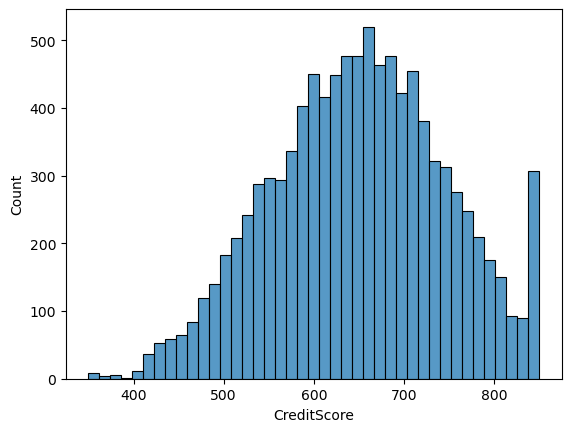

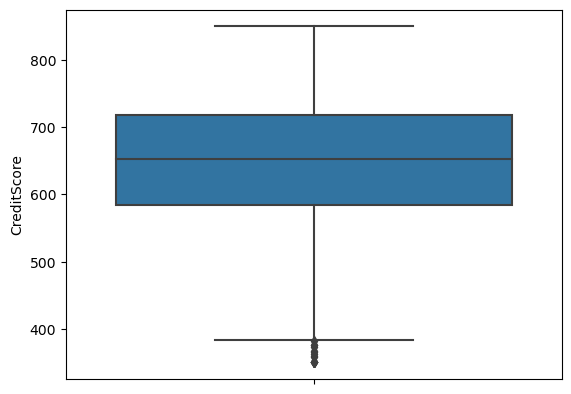

{'missing': 0,
 'min': 350,
 'max': 850,
 'var': 9341.860156575705,
 'std': 96.65329873613061,
 'p1': 432.0,
 'p10': 521.0,
 'p25': 584.0,
 'p50': 652.0,
 'p75': 718.0,
 'p99': 850.0}

In [128]:
numerical(data=bank, var="CreditScore")

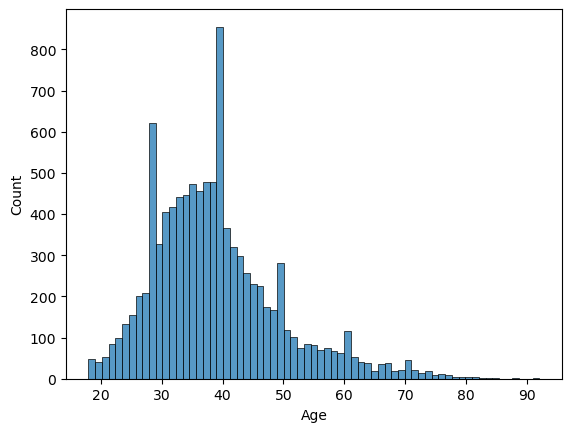

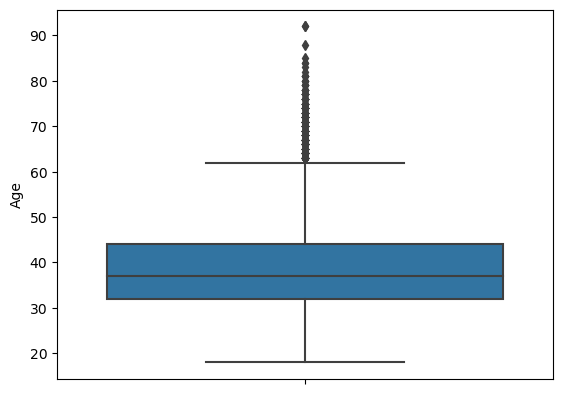

{'missing': 0,
 'min': 18,
 'max': 92,
 'var': 109.99408416841645,
 'std': 10.487806451704591,
 'p1': 21.0,
 'p10': 27.0,
 'p25': 32.0,
 'p50': 37.0,
 'p75': 44.0,
 'p99': 72.0}

In [129]:
numerical(data=bank, var="Age")

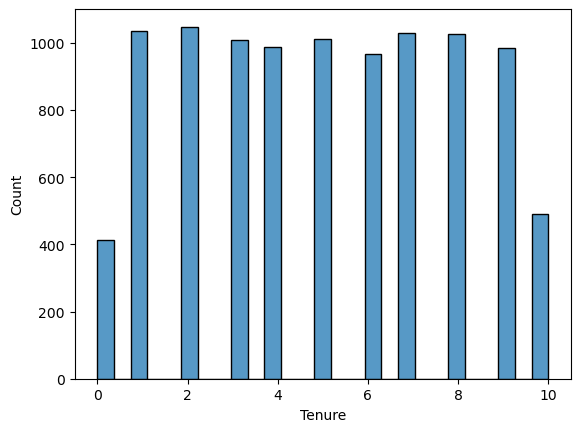

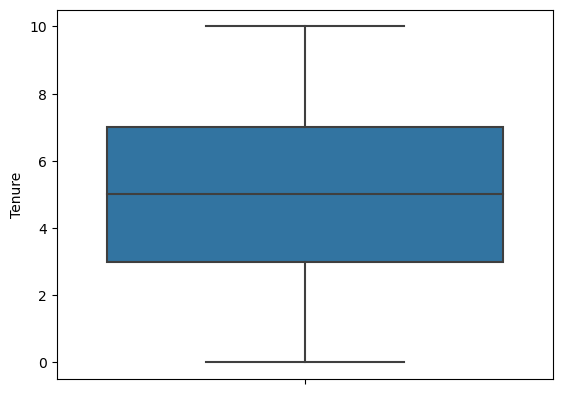

{'missing': 0,
 'min': 0,
 'max': 10,
 'var': 8.364672627262866,
 'std': 2.892174377049708,
 'p1': 0.0,
 'p10': 1.0,
 'p25': 3.0,
 'p50': 5.0,
 'p75': 7.0,
 'p99': 10.0}

In [130]:
numerical(data=bank, var="Tenure")

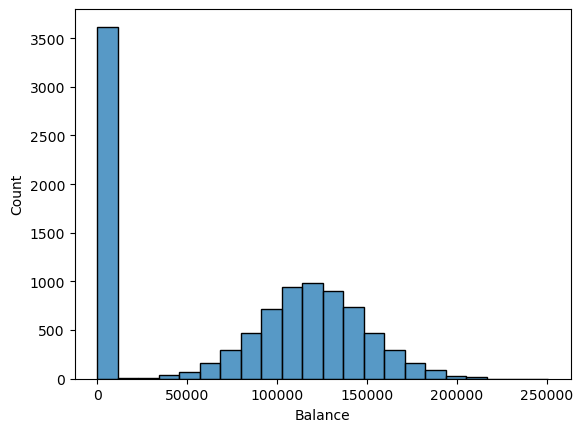

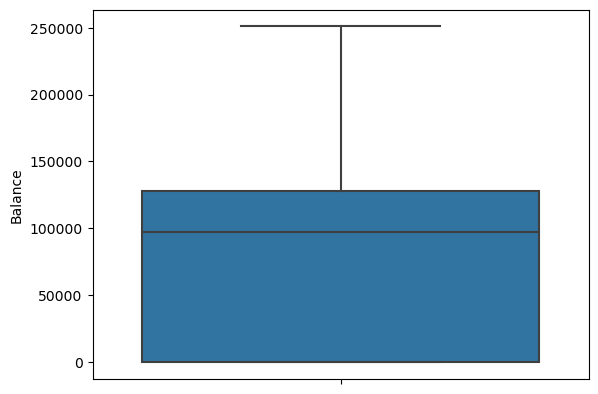

{'missing': 0,
 'min': 0.0,
 'max': 250898.09,
 'var': 3893436175.9907765,
 'std': 62397.40520238623,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 97198.54000000001,
 'p75': 127644.24,
 'p99': 185967.98540000003}

In [131]:
numerical(data=bank, var="Balance")

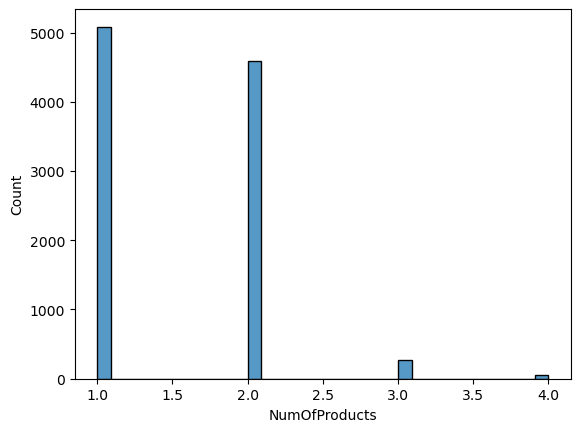

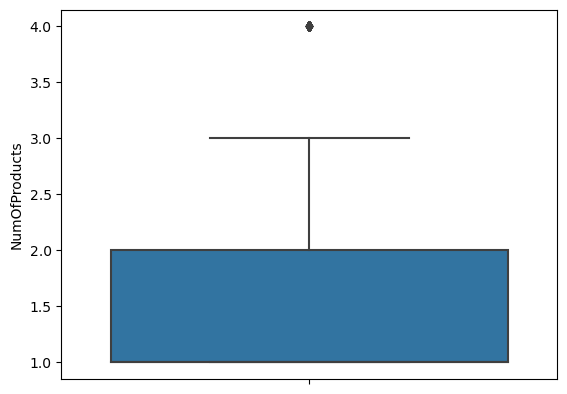

{'missing': 0,
 'min': 1,
 'max': 4,
 'var': 0.3383217921792214,
 'std': 0.5816543579989936,
 'p1': 1.0,
 'p10': 1.0,
 'p25': 1.0,
 'p50': 1.0,
 'p75': 2.0,
 'p99': 3.0}

In [132]:
numerical(data=bank, var="NumOfProducts")

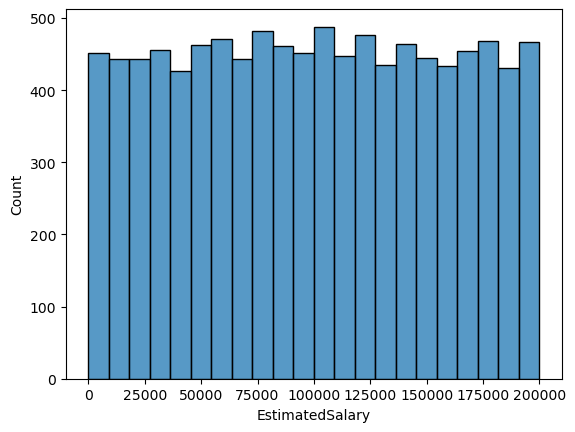

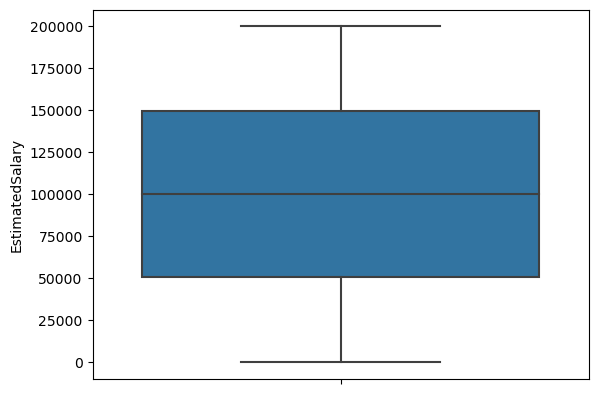

{'missing': 0,
 'min': 11.58,
 'max': 199992.48,
 'var': 3307456784.134519,
 'std': 57510.49281769822,
 'p1': 1842.8253000000004,
 'p10': 20273.58,
 'p25': 51002.11,
 'p50': 100193.915,
 'p75': 149388.2475,
 'p99': 198069.7345}

In [133]:
numerical(data=bank, var="EstimatedSalary")

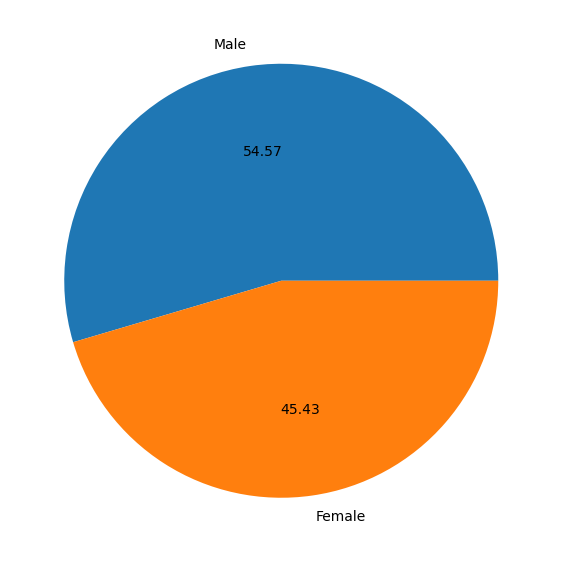

In [134]:
plt.figure(figsize=(7,8))
plt.pie(bank['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.2f')
plt.show()

In [135]:
bank.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

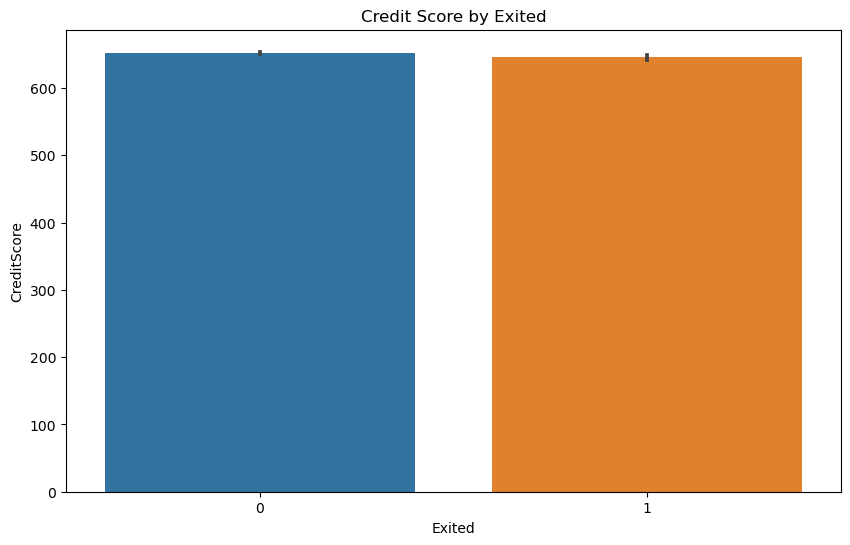

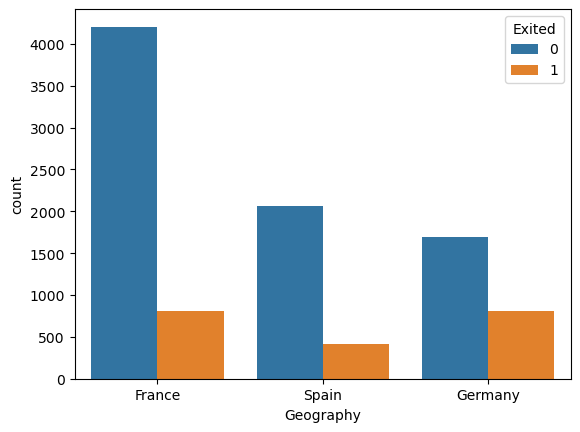

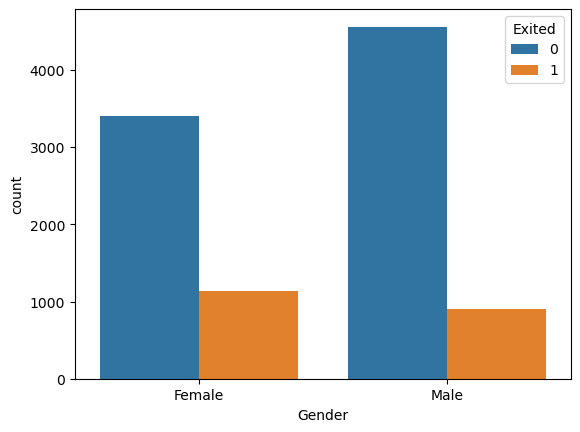

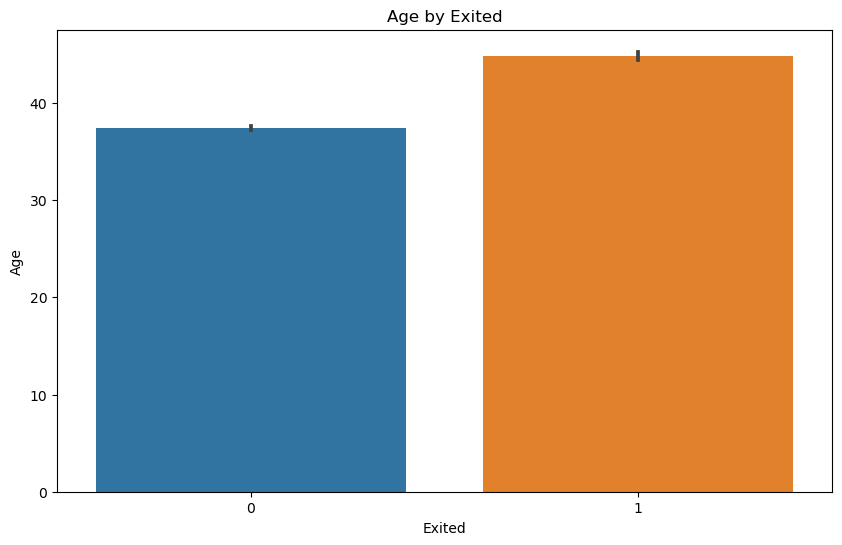

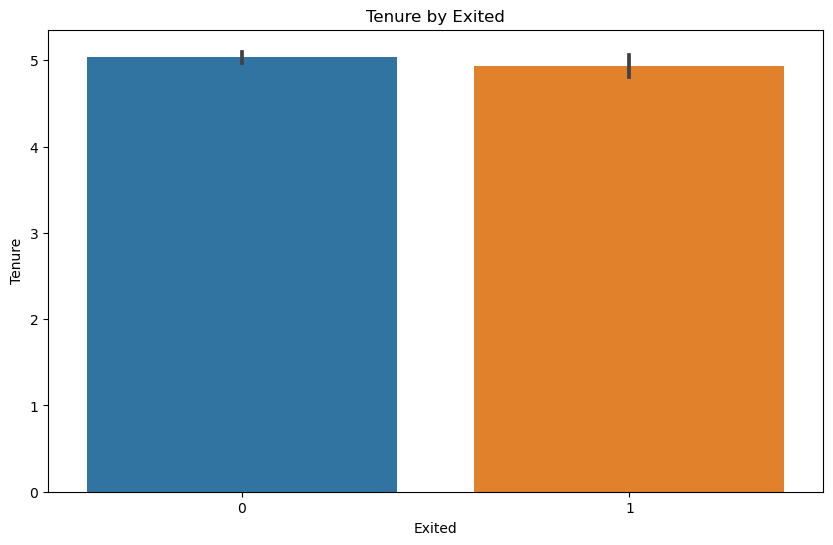

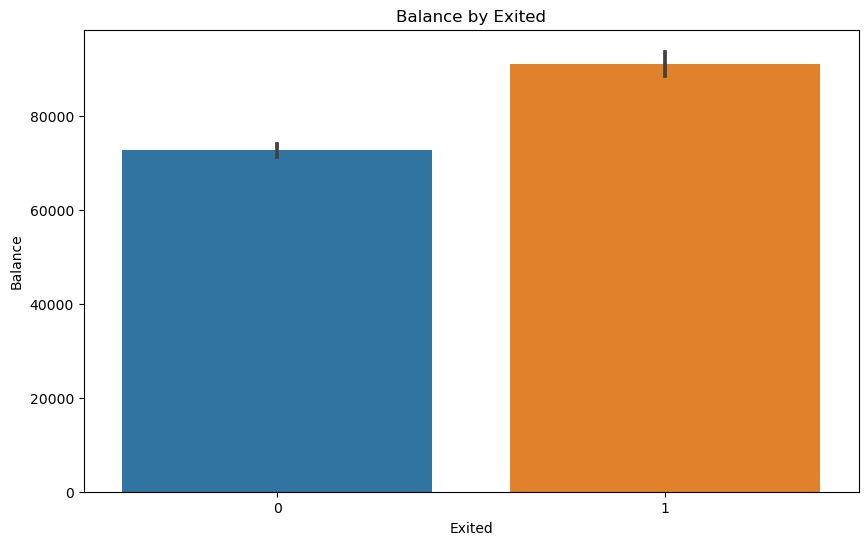

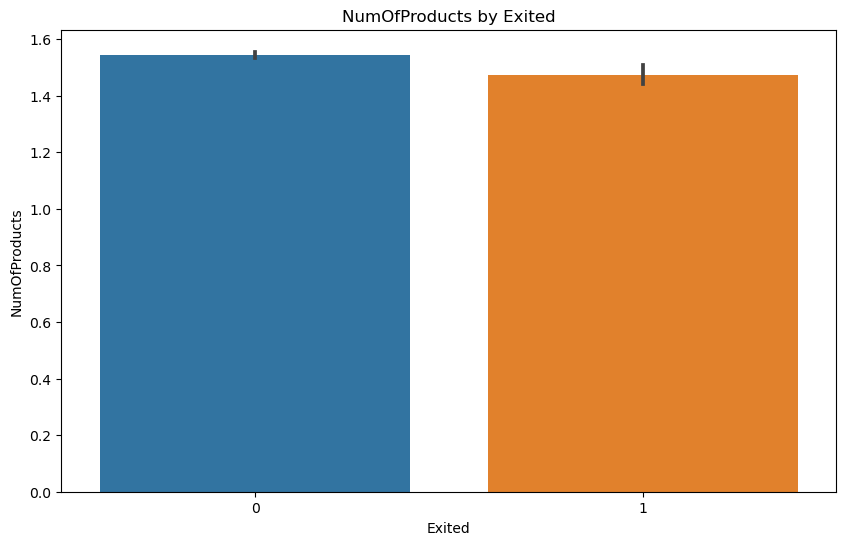

In [136]:
# Create a bar graph for CreditScore
plt.figure(figsize=(10, 6))
sns.barplot(data=bank, x='Exited', y='CreditScore')
plt.title('Credit Score by Exited')
plt.show()

# Create a count graph for Geograpy
sns.countplot(x='Geography',hue='Exited',data=bank)
plt.show()


# Create a count graph for Gender
sns.countplot(x='Gender',hue='Exited',data=bank)
plt.show()


# Create a bar graph for Age
plt.figure(figsize=(10, 6))
sns.barplot(data=bank, x='Exited', y='Age')
plt.title('Age by Exited')
plt.show()

# Create a bar graph for Tenure
plt.figure(figsize=(10, 6))
sns.barplot(data=bank, x='Exited', y='Tenure')
plt.title('Tenure by Exited')
plt.show()

# Create a bar graph for Balance
plt.figure(figsize=(10, 6))
sns.barplot(data=bank, x='Exited', y='Balance')
plt.title('Balance by Exited')
plt.show()

# Create a bar graph for NumOfProducts
plt.figure(figsize=(10, 6))
sns.barplot(data=bank, x='Exited', y='NumOfProducts')
plt.title('NumOfProducts by Exited')
plt.show()

### One-hot encode categorical variables

In [137]:
bank = pd.get_dummies(bank, columns=['Gender','Geography'])
order = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Exited']
bank = bank[order]
bank.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1,0


### Correlation Heatmap

In [189]:
bank.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.002857,-0.002857,-0.008928,0.005538,0.004780,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.027544,-0.027544,-0.039208,0.046897,-0.001685,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014733,0.014733,-0.002848,-0.000567,0.003868,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.012087,0.012087,-0.231329,0.401110,-0.134892,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.021859,-0.021859,0.001230,-0.010419,0.009039,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.005766,0.005766,0.002467,0.010577,-0.013480,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.022544,0.022544,0.003317,-0.020486,0.016732,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.008112,-0.008112,-0.003332,0.010297,-0.006482,0.012097
Gender_Female,0.002857,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,1.000000,-1.000000,-0.006772,0.024628,-0.016889,0.106512
Gender_Male,-0.002857,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-1.000000,1.000000,0.006772,-0.024628,0.016889,-0.106512


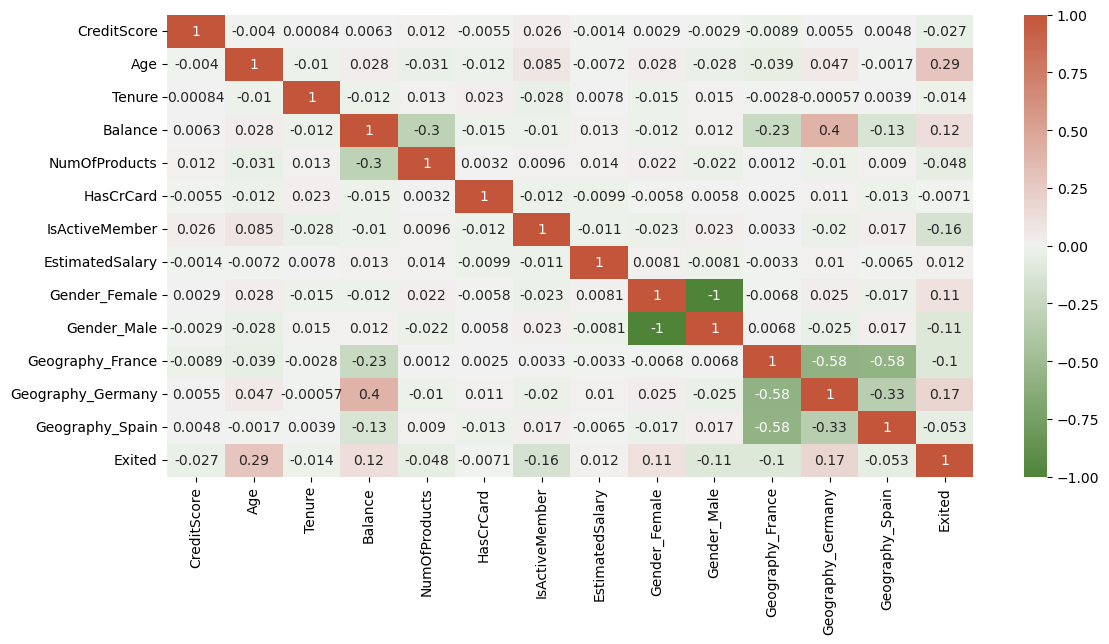

In [138]:
plt.figure(figsize=(13,6))
# Create a diverging colormap
cmap = sns.diverging_palette(120, 20, as_cmap=True) 

corr = bank.corr()
sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.show()

### The most powerful positive correlation with the target variable "Exited" is with the "Age" feature. The correlation coefficient is approximately 0.285323 and negative correlation with "Exited" is with the "IsActiveMember" feature, with a correlation coefficient of approximately -0.156128. 

# I am visualizing the correlation of the dataset with the seaborn library.
sns.pairplot(bank, hue = "Exited")
plt.show()

### Data Preprocessing

In [140]:
X = bank.drop(['Exited'], axis=1)
y = bank['Exited']

In [141]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Standardize the features (important for some models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model

In [144]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

### Evaluating the trained model

In [145]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

In [146]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matx = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [147]:
print(f"Logistic Regression Accuracy Score: {accuracy:.2f}")

print(f'Confusion Matrix:\n{conf_matx}')
# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Logistic Regression Accuracy Score: 0.81
Confusion Matrix:
[[1543   64]
 [ 314   79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [151]:
#Check the test score and train score to the Logistic Regression algorithm
print(f'The Test accuracy: {logistic_model.score(X_test_scaled,y_test)*100:.2f}')

#Train score for the data
print(f'The Train accuracy: {logistic_model.score(X_train_scaled, y_train)*100:.2f}')

The Test accuracy: 81.10
The Train accuracy: 81.14


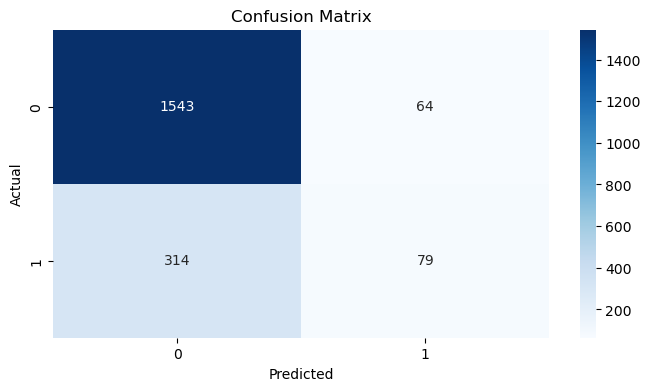

In [153]:
conf_matx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matx, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc

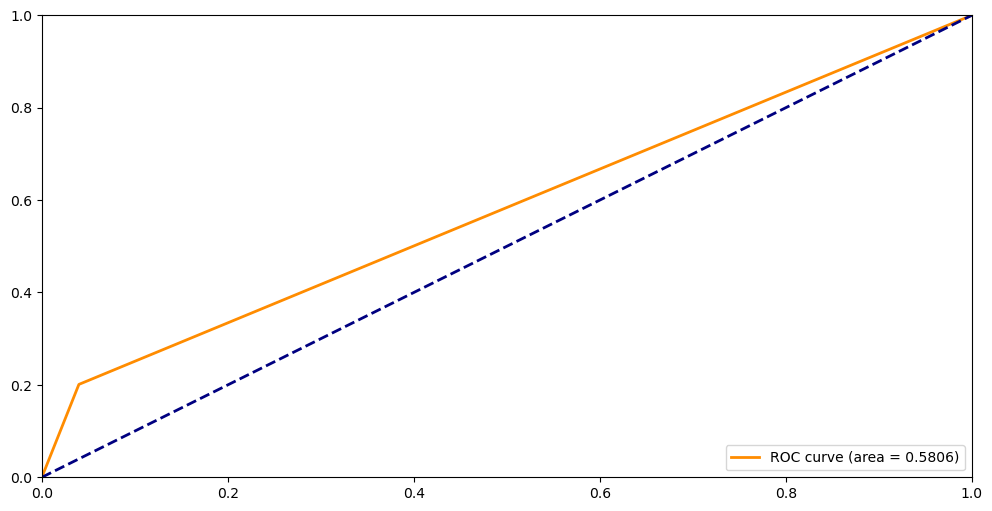

In [158]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
mnb_cv_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {mnb_cv_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

# Random Forest Model

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
Random_F = RandomForestClassifier()
Random_F.fit(X_train, y_train)

RandomForestClassifier()

### Hyperparameter tuning

In [162]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [163]:
parameters={"n_estimators":[900],
            "max_features":['sqrt', 'log2'],
            "bootstrap" : [True]}

In [164]:
# define grid search
grid_search = GridSearchCV(Random_F, param_grid=parameters, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=0, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': ['sqrt', 'log2'],
                         'n_estimators': [900]},
             scoring='accuracy')

In [166]:
grid_search.best_score_

0.8632500000000001

In [167]:
rf_pred=grid_search.predict(X_test)

In [168]:
# Evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
conf_matx = confusion_matrix(y_test, rf_pred)
report = classification_report(y_test, rf_pred)

In [169]:
print(f"Random Forest Accuracy Score: {accuracy:.2f}")

print(f'Confusion Matrix:\n{conf_matx}')
# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Random Forest Accuracy Score: 0.86
Confusion Matrix:
[[1547   60]
 [ 211  182]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [165]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {grid_search.score(X_test,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {grid_search.score(X_train, y_train)*100:.2f}')

The Test_accuracy: 86.45
The Train_accuracy: 100.00


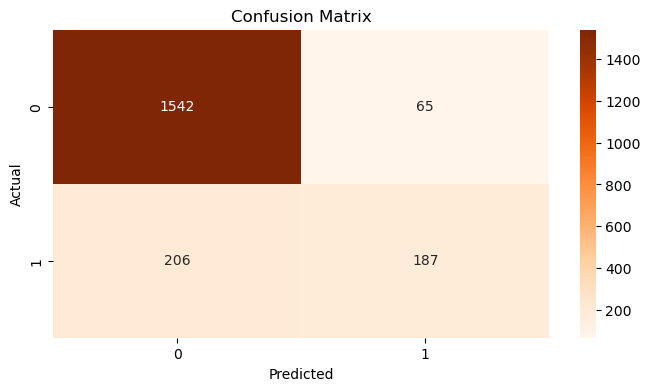

In [200]:
confu_matx = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matx, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

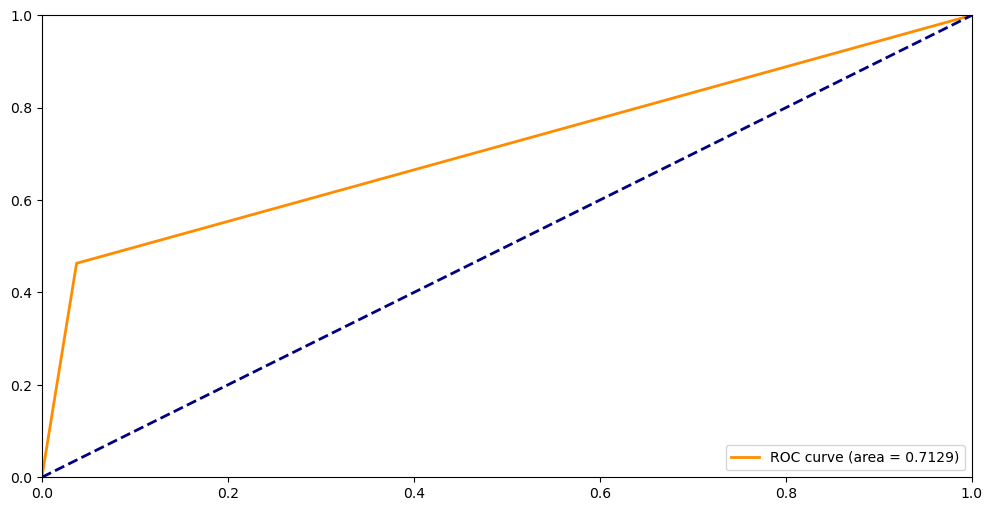

In [188]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
mnb_cv_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {mnb_cv_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting classifier

In [211]:
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

### Hyperparameter tuning

In [212]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [213]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]})

In [214]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [215]:
# Train the model with the best hyperparameters
best_gradient_boosting_model = GradientBoostingClassifier(**best_params)
best_gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [216]:
# Make predictions on the test set
predictions = best_gradient_boosting_model.predict(X_test)

In [217]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matx = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

In [218]:
print(f"Gradient Boosting Accuracy Score: {accuracy:.2f}")

print(f'Confusion Matrix:\n{conf_matx}')
# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Gradient Boosting Accuracy Score: 0.86
Confusion Matrix:
[[1542   65]
 [ 206  187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [219]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {best_gradient_boosting_model.score(X_test,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {best_gradient_boosting_model.score(X_train, y_train)*100:.2f}')

The Test_accuracy: 86.45
The Train_accuracy: 87.40


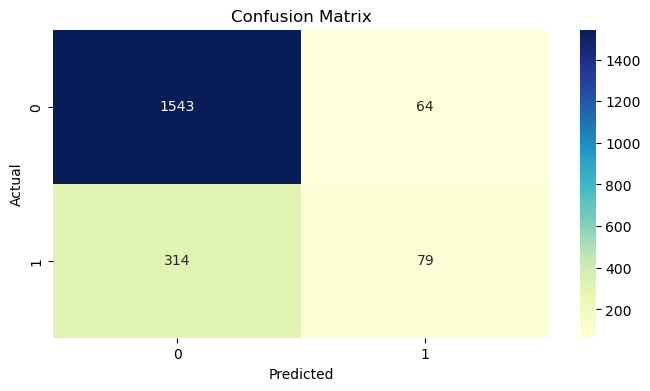

In [208]:
confus_matx = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matx, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

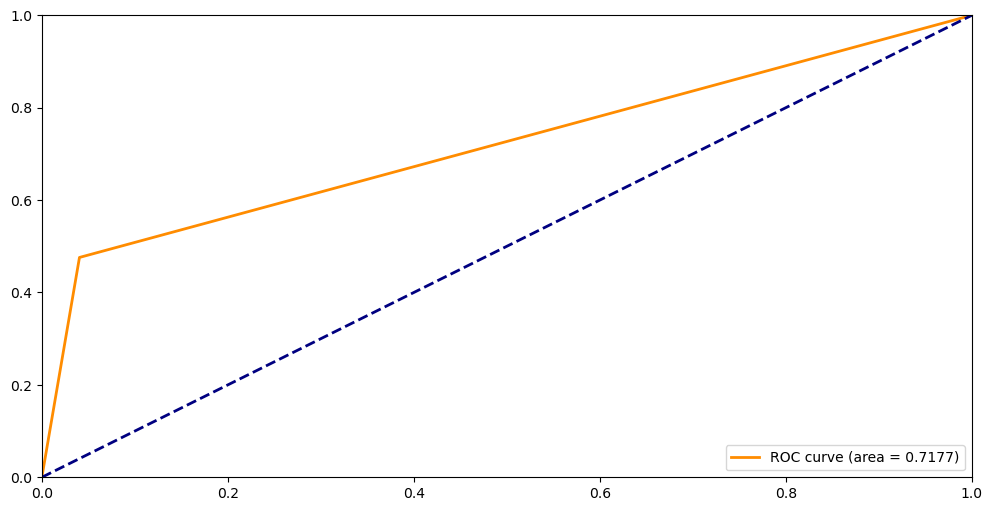

In [187]:
fpr, tpr, _ = roc_curve(y_test, predictions)
mnb_cv_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {mnb_cv_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

Logistic Regression Accuracy: 0.811
Random Forest Accuracy: 0.864
Gradient Boosting Accuracy: 0.8645

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
         

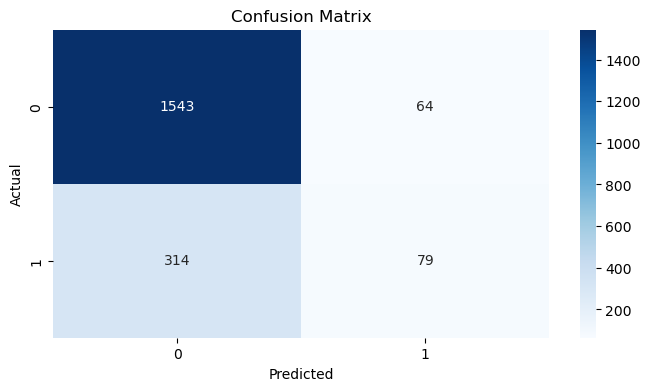


Random Forest Confusion Matrix:
 [[1542   65]
 [ 207  186]]


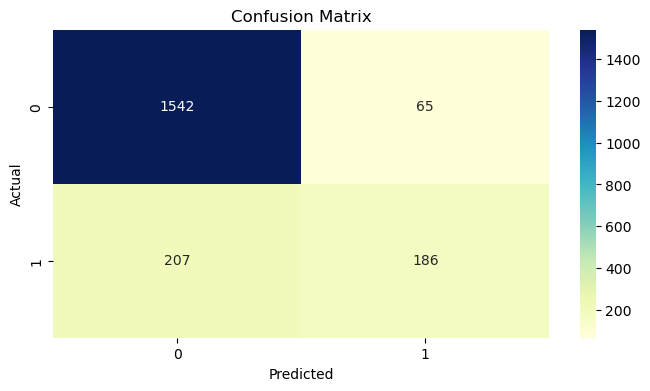


Gradient Boosting Confusion Matrix:
 [[1542   65]
 [ 206  187]]


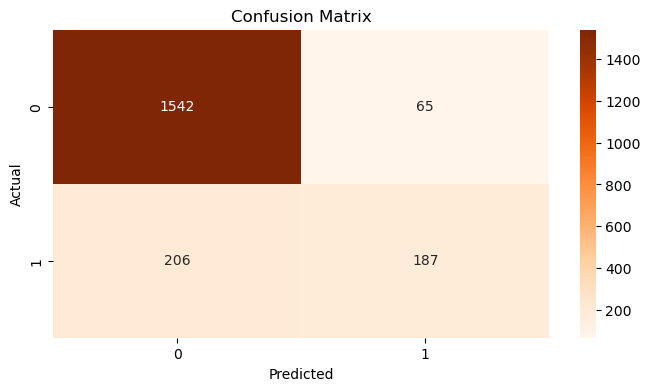

In [210]:
# Make predictions
y_pred = logistic_model.predict(X_test_scaled)
rf_pred=grid_search.predict(X_test)
predictions = best_gradient_boosting_model.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, predictions))

# You can also print classification reports or confusion matrices for more detailed evaluation
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, predictions))

# Confusion Matrix for Logistic Regression with matplotlib
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
conf_matx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matx, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
confu_matx = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(confu_matx, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, predictions))
confus_matx = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 4))
sns.heatmap(confus_matx, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Project Report
## All Train, Test Accuracy Reports through visualization

In [220]:
data = {'Models' : ["Logistic Regression Model", "Random Forest Model",  "Gradient Boosting Model"],
'Train' : [81.14, 100.00, 87.40],
'Test' : [81.10, 86.45, 86.45 ]} 

In [221]:
df = pd.DataFrame(data)

In [222]:
df

,Models,Train,Test
0,Logistic Regression Model,81.14,81.10
1,Random Forest Model,100.00,86.45
2,Gradient Boosting Model,87.40,86.45


In [223]:
# Find the model with the highest testing accuracy
best_model = df.loc[df['Test'].idxmax()]

print("Best Model Predicted:")
print(best_model)

Best Model Predicted:
Models    Random Forest Model
Train                   100.0
Test                    86.45
Name: 1, dtype: object


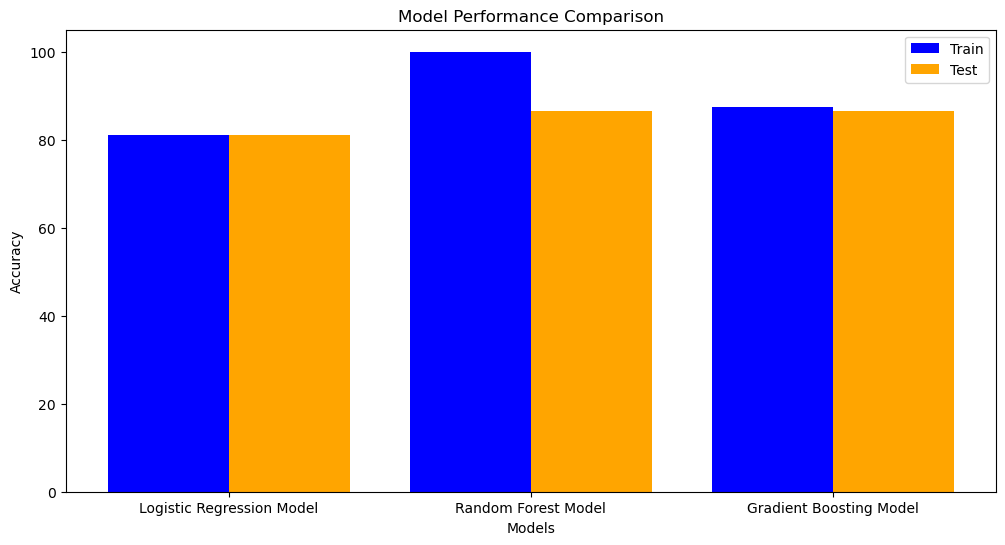

In [225]:
plt.figure(figsize=(12, 6))

# Plot train and test accuracies side by side
bar_width = 0.4
bar_positions_train = df.index
bar_positions_test = df.index + bar_width

plt.bar(bar_positions_train, df['Train'], width=bar_width, label='Train', color='blue')
plt.bar(bar_positions_test, df['Test'], width=bar_width, label='Test', color='orange')

# Set labels and title
plt.xticks(bar_positions_train + bar_width / 2, df['Models'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

### The Random Forest Model and the Gradient Boosting Model have the same testing accuracy of 86.45%. The Logistic Regression Model has a slightly lower testing accuracy of 81.10%. Random Forest Model or Gradient Boosting Model as the best-performing model.

# THANK YOU!